# 머신 러닝 (2)

## 3) Decision Tree

* 회귀, 분류 알고리즘
* 스무고개 알고리즘과 매우 비슷
* 회귀 : 지니 불순도를 줄이는 방향으로 분기하면서 데이터 값을 예측
* 분류 : 오차를 줄이는 방향으로 분기하면서 데이터를 분류

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/titanic_train.csv'
data = pd.read_csv(path)

### 1. 데이터 이해

In [3]:
# 상위 데이터 확인
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 기초통계량 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# target 확인
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
# 결측치 확인
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# 상관관계 확인
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### 2. 데이터 전처리

**1) Title 변수 추가**

In [8]:
# 호칭 추출
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
data['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [9]:
# 대표 호칭 이외에는 Others로 변경
main_tit_list = ['Mr', 'Miss', 'Mrs']
data.loc[data['Title'].isin(main_tit_list)==False, 'Title'] = 'Others'

**2) 결측치 처리**

In [10]:
# Age 컬럼에 대하여 호칭 별 Age 컬럼의 중앙값으로 데이터를 채운다.
data.groupby('Title')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [11]:
# Age 컬럼의 결측치를 Title 별 중앙값으로 채우기
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'), inplace=True)

In [12]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [13]:
# Embarked 컬럼의 결측치를 최빈값으로 채우기
data['Embarked'].value_counts()
data['Embarked'].fillna('S', inplace=True)

In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

**3) AgeGroup 변수 추가**

In [15]:
data['AgeGroup'] = pd.cut(data['Age'],
                          bins=[0, 16, 25, 35, 60, 100],
                          labels=['1_16', '17_25', '26_35', '36_60', '61_100'])

data['AgeGroup'].head()

0    17_25
1    36_60
2    26_35
3    26_35
4    26_35
Name: AgeGroup, dtype: category
Categories (5, object): ['1_16' < '17_25' < '26_35' < '36_60' < '61_100']

**4) 가변수화**

In [16]:
# 가변수화
dummy_vars = ['Title', 'AgeGroup', 'Pclass', 'Sex', 'Embarked']
data = pd.get_dummies(data, columns=dummy_vars, drop_first=True)

**5) 불필요한 변수 제거**

In [17]:
# 불필요한 열 제거
drop_cols = ['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin']
data.drop(drop_cols, axis=1, inplace=True)

# 확인
data.head()

,Survived,SibSp,Parch,Fare,Title_Mr,Title_Mrs,Title_Others,AgeGroup_17_25,AgeGroup_26_35,AgeGroup_36_60,AgeGroup_61_100,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,7.2500,1,0,0,1,0,0,0,0,1,1,0,1
1,1,1,0,71.2833,0,1,0,0,0,1,0,0,0,0,0,0
2,1,0,0,7.9250,0,0,0,0,1,0,0,0,1,0,0,1
3,1,1,0,53.1000,0,1,0,0,1,0,0,0,0,0,0,1
4,0,0,0,8.0500,1,0,0,0,1,0,0,0,1,1,0,1


**6) x, y 분리**

In [18]:
# target 확인
target = 'Survived'

# x, y 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**7) 학습용, 평가용 데이터 분리**

In [19]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

### 3. 모델링

In [20]:
# 의사결정트리, 평가지표 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 모델 선언하기
# 동일한 모델링 결과를 얻기 위해 (동일한 트리 생성) random_state 속성값 지정
model = DecisionTreeClassifier(max_depth=4, random_state=2022)

# 학습
model.fit(x_train, y_train)

# 예측
y_pred = model.predict(x_test)

# 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[149  19]
 [ 25  75]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       168
           1       0.80      0.75      0.77       100

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.84      0.83       268



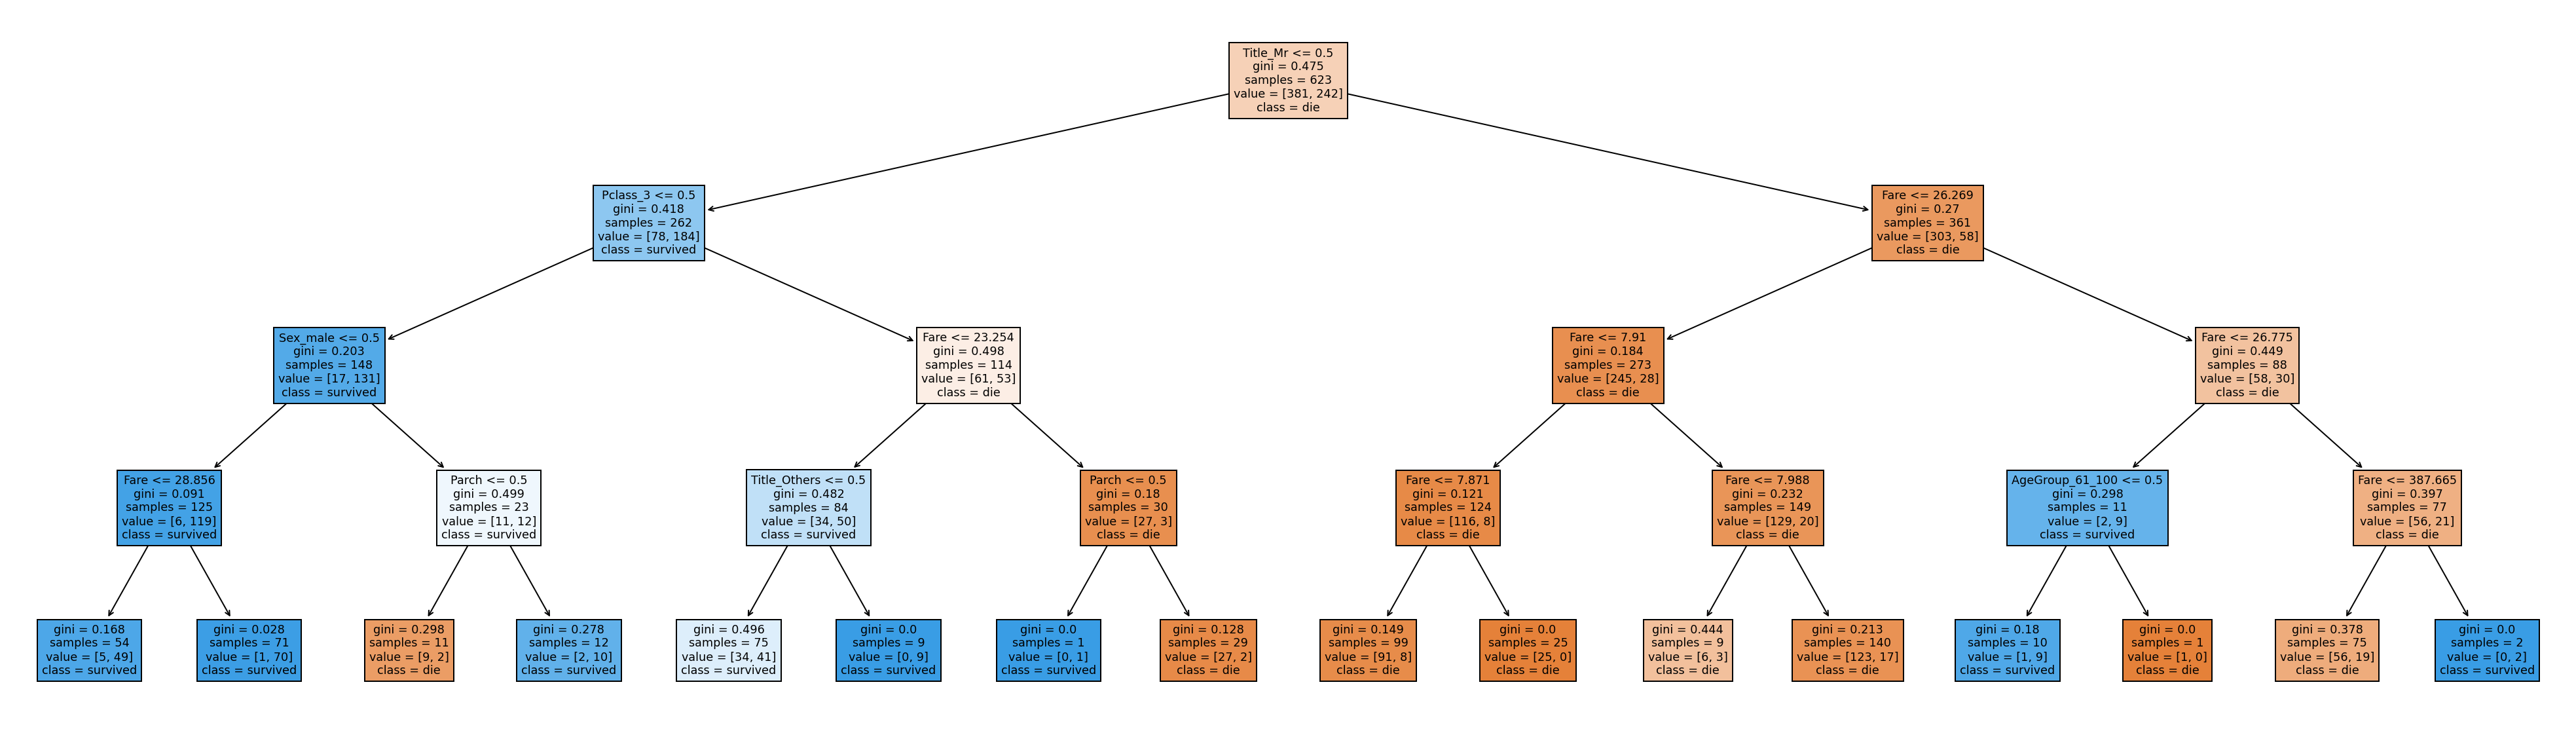

In [21]:
# 시각화 모듈 불러오기
from sklearn import tree

fig = plt.figure(figsize=(35, 10))
my_tree = tree.plot_tree(model,
                        feature_names=x.columns,
                        class_names=['die', 'survived'],
                        filled=True)

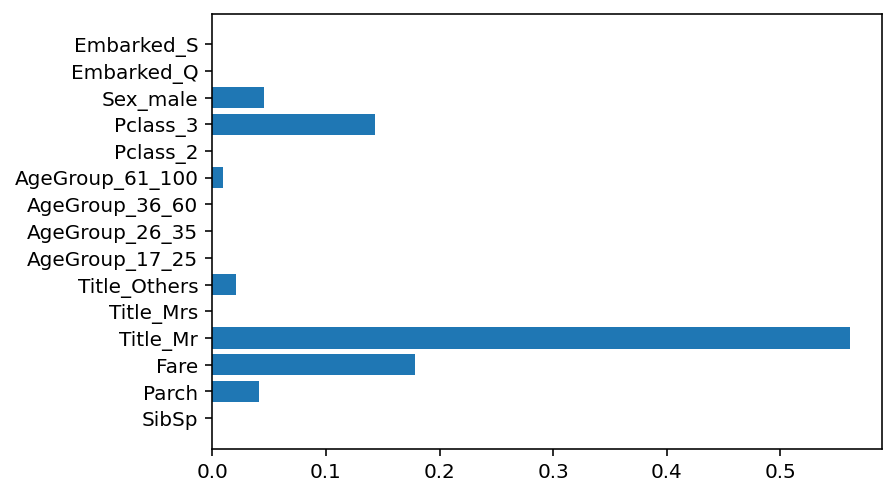

In [22]:
# 변수 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

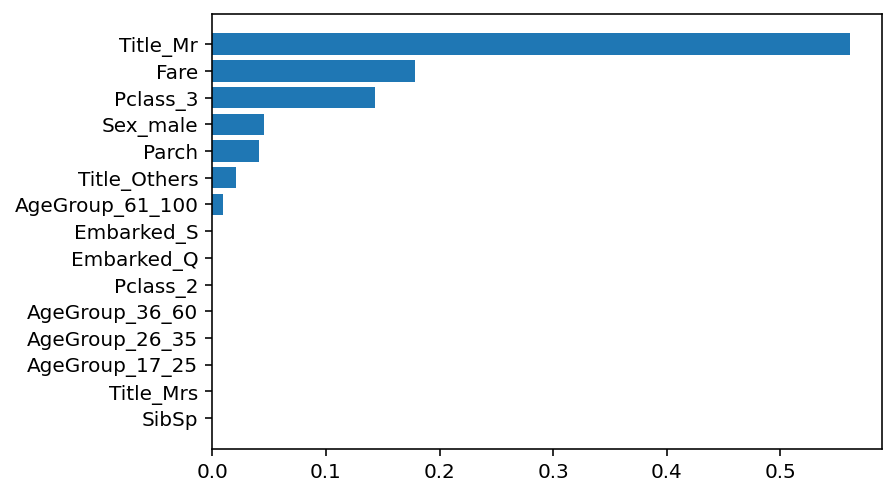

In [25]:
# 변수 중요도 크기 순으로 정렬
score = pd.DataFrame()
score['feature'] = list(x)
score['importance'] = model.feature_importances_
score.sort_values(by='importance', ascending=True, inplace=True)

# 시각화
plt.barh(score['feature'], score['importance'])
plt.show()

## 4) Logistic Regression

* 분류 알고리즘
* 선형 회귀 알고리즘과 달리 확률이 0과 1 사이의 값

In [188]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

### 1. 데이터 이해

In [189]:
# 상위 데이터 확인
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [190]:
# 기초통계량 확인
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [191]:
# 범주값 개수 확인
data['Species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

In [192]:
# 상관관계 확인
data.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


### 2. 데이터 전처리

In [193]:
# 결측치 확인
data.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [194]:
# x, y 분리
target = 'Species'
x = data.drop(target, axis=1)
y = data[target]

In [195]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

In [196]:
# 학습용, 평가용 데이터 7:3 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

### 3. 모델링

In [197]:
# 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 선언하기
# 충분한 max_iter를 지정하여 error를 없앤다.
model = LogisticRegression(max_iter=500)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

